Dataset https://www.kaggle.com/datasets/aungpyaeap/fish-market \
Objective: A multiple linear regression model to predict fish weights

In [10]:
%pip install seaborn

     -------------------------------------- 288.2/288.2 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Tuyen\\anaconda3\\Lib\\site-packages\\~atplotlib\\ft2font.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [16]:
import pandas as pd # data in tabular form with rows and columns
import numpy as np # when working with array, matrix, multi dimension array
import matplotlib.pyplot as plt # graph
import seaborn as sns # beautiful graph based on matplotlib
import statsmodels.api as sa # main use to create model
import collections # python library to work with different types of collections, like Counter, UserDict, DefaultDict, Nametupled

ModuleNotFoundError: No module named 'seaborn'

In [4]:
sns.set()

NameError: name 'sns' is not defined

### Load data

In [3]:
raw_data = pd.read_csv('datasets/fish.csv')

In [4]:
raw_data.shape

(159, 7)

In [5]:
raw_data.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

### Data processing

In [6]:
my_df = raw_data.copy()

In [7]:
my_df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

No missing data

In [8]:
collections.Counter(my_df.Species)

Counter({'Bream': 35,
         'Roach': 20,
         'Whitefish': 6,
         'Parkki': 11,
         'Perch': 56,
         'Pike': 17,
         'Smelt': 14})

We have 7 types of species, to use fish type as a "feature" in our regression model, we need to convert the feature to a numeric representation

#### Dummy variable encoding for fish type

In [9]:
pd.get_dummies(my_df.Species, drop_first=True)

Parkki  Perch  Pike  Roach  Smelt  Whitefish
0         0      0     0      0      0          0
1         0      0     0      0      0          0
2         0      0     0      0      0          0
3         0      0     0      0      0          0
4         0      0     0      0      0          0
..      ...    ...   ...    ...    ...        ...
154       0      0     0      0      1          0
155       0      0     0      0      1          0
156       0      0     0      0      1          0
157       0      0     0      0      1          0
158       0      0     0      0      1          0

[159 rows x 6 columns]

In [10]:
dummies = pd.get_dummies(my_df.Species, drop_first=True)

In [11]:
my_df = pd.concat([my_df, dummies], axis=1)

In [12]:
my_df.head()

Species  Weight  Length1  Length2  Length3   Height   Width  Parkki  Perch  \
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200       0      0   
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056       0      0   
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961       0      0   
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555       0      0   
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340       0      0   

   Pike  Roach  Smelt  Whitefish  
0     0      0      0          0  
1     0      0      0          0  
2     0      0      0          0  
3     0      0      0          0  
4     0      0      0          0

We don't need column Species any more, can drop it

In [13]:
del my_df["Species"]

Notice that length1, length2, length3 aren't descriptive, thus we should rename the column name with better names

In [14]:
my_df.rename({'Length1': 'vertical_length', 'Length2': 'diagnol_length', 'Length3': 'cross_length'}, axis=1, inplace=True)

### The first simple linear regression

Let's start off with a simple linear regression to understand the idea behind of a linear regression

A simple linear regression only uses one feature to predict or explain the variable of interest y

Intuitively, "height" and "weight" often correlates. We are going to create a model that helps predict the fish weights using their heights 

#### Scatter plot

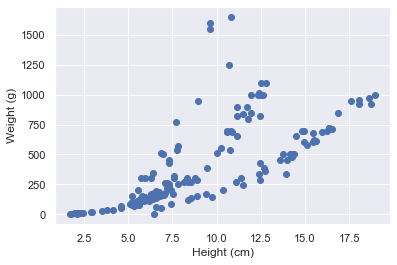

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(my_df.Height, my_df.Weight)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (g)')
plt.show()

Let's create a line of "best fit": WEIGHT = c + coef * HEIGHT\
In other words, find the best constant "c" and the best coefficient "coef" that can fit as many data points as possible

#### Using statsmodel to build our first model

Extract features to use in the prediction. In our case, only use one feature "HEIGHT" to predict "WEIGHT"

In [16]:
x1 = my_df.Height


In [17]:
y = my_df.Weight

Remember the constant c that we also want to predict, beside the coef for the Height? We also need to tell statsmodel to include the constant into our model

In [18]:
x = sa.add_constant(x1)

Set up the model and fit the line

In [19]:
simple_model = sa.OLS(y, x)
simple_model_result = simple_model.fit()

DONE!!! We got our first simple model. Lets visualize our line of best fit

#### The line of best fit

In [20]:
simple_model_result.params

const    -144.385971
Height     60.496351
dtype: float64

Our model is: WEIGHT = -144.385971 + 60.496351 * HEIGHT

In [21]:
yhat = -144.385971 + 60.496351 * x1

Lets draw the prediction line

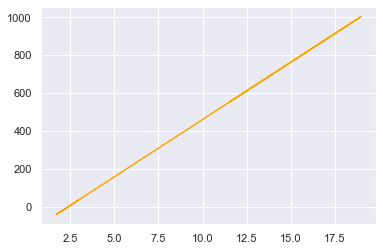

In [22]:
plt.plot(x1, yhat, c="orange")
plt.show()

Now the line with the actual data points

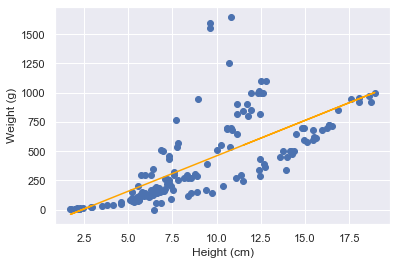

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(x1, y) # draw the actual data points
plt.plot(x1, yhat, c="orange") # draw the line of best fit
plt.xlabel('Height (cm)')
plt.ylabel('Weight (g)')
plt.show()


We have not done yet!!! Lets interpret our model's result and its performance using the summary that statsmodel provide

In [25]:
simple_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     173.3
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           3.84e-27
Time:                        15:22:21   Log-Likelihood:                -1101.0
No. Observations:                 159   AIC:                             2206.
Df Residuals:                     157   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -144.3860     45.663     -3.162      0.002    -234.579     -54.193
Height        60.4964      4.595     13.164      0.000      51.419      69.573
==============================================================================
Omnibus:                       95.711   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.586
Skew:                           2.288   Prob(JB):                    1.61e-105
Kurtosis:                      10.204   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Coefficient

Since the model tries to explain the WEIGHT using only one variable HEIGHT, we got one coefficient for the constant and one coefficient for HEIGHT
* coef for const = -144.3860
* coef for Height = 60.4964  

How to intepret that? One cm increase in Height result in 60.4964 gram increase in Weight

##### P values

H0: the coefficient isn't significant, coef=0\
H1: the coefficient is significant, coef <> 0

* P_const = 0.002: means that if H0 is true, the likelihood of obtainning such data is 0.2% (too small, so contradict) Thus, we are able to reject H0. The predicted coefficient for constant term in our model is significant, or in other words, it has predictive power
* P_Height = 0.00: means that if H0 is true, the likelihood of obtainning such data is  0. We are able to reject null hypothesis. The predicted coefficient for Height is also significant in predicting the Weight

##### R_squared

R_squared is the amount of variability in the dependent variable y that is explained by the model 

R_squared = 0.525 means that our model of using single Height to predict can explain 52.5% of the variability in Weight, which is very good.

### End-to-end development of an multivariate linear regression model

Above, we only use one factor to predict. More features added often make our model have more predictive power. Sometimes, it is not the case, adding an irrelevant feature can worsen our model though. Following we will use all of the factors or features that we have to predict WEIGHT. Also, in order to building a good model, there are some additional steps that have not been mentioned, but will be carried out here.

A model of n features or n independent variables looks something like this:\
yhat = B0 + B1 x1 + B2 x2 + B3 x3 + ... + Bn xn + e
* yhat is the value we attempt to predict
* B0 is the constant term
* B1, B2, B3, ... is the coefficient, the amount of increase (if positive coef) or decrease (if negative coef) in the yhat as the value of associated independent variable increase one unit
* e: is called residual, is the potential error, something that will not explained by our model

#### Weight distribution

Since data can have outliers (those that distance away from other observations), they aren't good for our model. We can try to remove them

In [2]:
plt.hist(my_df[my_df.Weight<q].Weight)
plt.title('Distribution of Weights', size=20)
plt.ylabel('Count')
plt.xlabel('Weight (g)')
plt.show()

NameError: name 'plt' is not defined

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

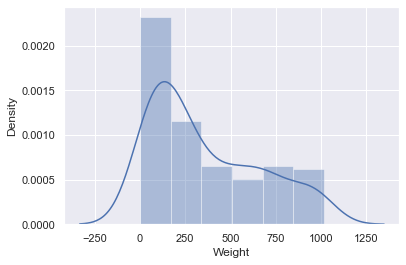

In [100]:
sns.distplot(my_df[my_df.Weight<q].Weight)

In [89]:
import scipy.stats
import pylab

[]

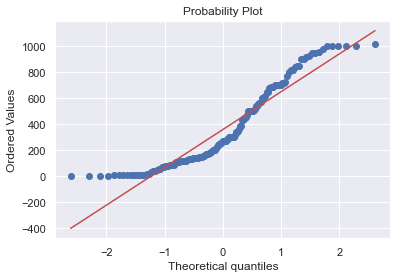

In [97]:
scipy.stats.probplot(my_df[my_df.Weight<q].Weight, plot=pylab)
pylab.plot()

#### Check assumption

##### Linearity

Since our model tries to draw a line that best fit our data points, the indepedent variable and depedent variable should have a linear relationship

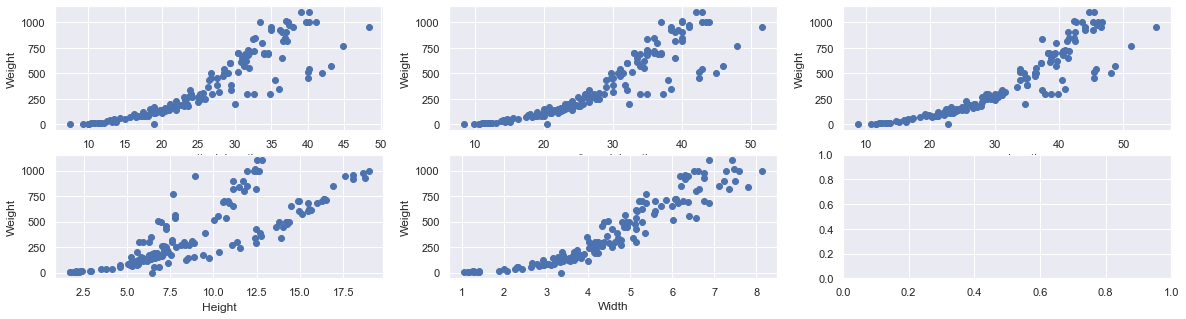

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,5))

for i,var in enumerate(['vertical_length', 'diagnol_length', 'cross_length', 'Height', 'Width']):
    r,c = int(i/3), i%3
    ax[r,c].scatter(my_df[var], my_df.Weight)
    ax[r,c].set_ylabel('Weight')
    ax[r,c].set_xlabel(var)
    

In [32]:
my_df.corr()['Weight'][1:6]

vertical_length    0.890173
diagnol_length     0.894415
cross_length       0.902576
Height             0.815237
Width              0.925664
Name: Weight, dtype: float64

##### Multicollinearity using Variance Inflation Factor

* Muticollinearity happens when independent variables highly correlates with one another. This results in the model hardly discern the effect of each independent variable on the dependent variable
* Multicollinearity does not influence the predictive power of the model, but with multicollinearity, the coefficient or the relationship that we interpret between one dependent variable and the dependent variable is no longer correct. 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
def compute_vif(variables):
    """
    variables: variables that we want to check for collinearity (pd.DataFrame)
    """
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif['feature'] = variables.columns
    return vif

In [37]:
variables = my_df[['vertical_length', 'diagnol_length', 'cross_length', 'Height', 'Width']]
vif = compute_vif(variables)

In [38]:
vif

VIF          feature
0  11640.943653  vertical_length
1  15183.972890   diagnol_length
2   3093.805839     cross_length
3     75.546906           Height
4     96.285071            Width

VIF>5 indicates strong multicollinearity. Intuitively, this occurs since these features have the main effect on the WEIGHT. The remedy of the problem is to sum the three types of length together.


In [52]:
my_df['length'] = my_df.vertical_length + my_df.cross_length + my_df.cross_length
my_df.head()

Weight  vertical_length  diagnol_length  cross_length   Height   Width  \
0   242.0             23.2            25.4          30.0  11.5200  4.0200   
1   290.0             24.0            26.3          31.2  12.4800  4.3056   
2   340.0             23.9            26.5          31.1  12.3778  4.6961   
3   363.0             26.3            29.0          33.5  12.7300  4.4555   
4   430.0             26.5            29.0          34.0  12.4440  5.1340   

   Parkki  Perch  Pike  Roach  Smelt  Whitefish  length  
0       0      0     0      0      0          0    83.2  
1       0      0     0      0      0          0    86.4  
2       0      0     0      0      0          0    86.1  
3       0      0     0      0      0          0    93.3  
4       0      0     0      0      0          0    94.5

In [54]:
variables = my_df[['length', 'Height', 'Width']]
compute_vif(variables)

VIF feature
0  41.070297  length
1  14.953017  Height
2  51.478421   Width

In [55]:
my_df.describe()

Weight  vertical_length  diagnol_length  cross_length      Height  \
count   155.000000       155.000000      155.000000    155.000000  155.000000   
mean    369.573548        25.485806       27.604516     30.383226    8.939934   
std     312.685376         8.897865        9.555969     10.468442    4.336074   
min       0.000000         7.500000        8.400000      8.800000    1.728400   
25%     120.000000        19.000000       21.000000     22.950000    5.926950   
50%     270.000000        25.000000       26.500000     29.200000    7.615600   
75%     605.000000        32.000000       35.000000     39.350000   12.379300   
max    1100.000000        48.300000       51.700000     55.100000   18.957000   

            Width      Parkki       Perch        Pike       Roach       Smelt  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean     4.358886    0.070968    0.361290    0.083871    0.129032    0.090323   
std      1.664295    0.257603    0.481932    0.278093    0.336322    0.287573   
min      1.047600    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.363600    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      4.239000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      5.373200    0.000000    1.000000    0.000000    0.000000    0.000000   
max      8.142000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Whitefish      length  
count  155.000000  155.000000  
mean     0.038710   86.252258  
std      0.193527   29.773522  
min      0.000000   25.100000  
25%      0.000000   65.100000  
50%      0.000000   83.200000  
75%      0.000000  111.450000  
max      1.000000  158.500000

Then, we will standardize the data to somehow remove the collinearity in the data

#### Standardize data

Standardization or normalization is the process of subtracting the value from the mean and divides by the standard deviation

Standardization has two benefits here:
* Remove collinearity
* Allow compare features with the same magnitude impact (which feature has more impact on the dependent variable?)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(variables) # for each column, it finds the mean and the standard deviation

StandardScaler()

In [59]:
scaled_variables = scaler.transform(variables) # subtract each value from its column mean and divide by its column std

In [60]:
scaled_variables

array([[-1.02848158e-01,  5.96952416e-01, -2.04281295e-01],
       [ 4.97827696e-03,  8.19068524e-01, -3.21208305e-02],
       [-5.13045136e-03,  7.95422413e-01,  2.03273642e-01],
       [ 2.37479028e-01,  8.76911260e-01,  5.82393012e-02],
       [ 2.77913942e-01,  8.10739170e-01,  4.67240965e-01],
       [ 3.35196735e-01,  1.07875927e+00,  3.42701917e-01],
       [ 3.21718431e-01,  1.21228345e+00,  5.54345962e-01],
       [ 3.82370801e-01,  8.63029004e-01,  1.99596545e-01],
       [ 3.89109953e-01,  1.17188608e+00,  2.92307608e-01],
       [ 4.93566812e-01,  1.22318102e+00,  3.61991605e-01],
       [ 4.90197236e-01,  1.23155665e+00,  4.49277443e-01],
       [ 5.00305965e-01,  1.25668353e+00,  2.74705768e-01],
       [ 5.27262573e-01,  1.11503824e+00,  5.49406090e-03],
       [ 6.01393248e-01,  1.15059995e+00,  4.30349437e-01],
       [ 5.91284519e-01,  1.39157279e+00,  4.89424106e-01],
       [ 5.91284519e-01,  1.50346378e+00,  7.36090990e-01],
       [ 6.99110955e-01,  1.36982392e+00

Lets test multicollinearity with our scaled variables

In [61]:
compute_vif(pd.DataFrame(scaled_variables, columns=variables.columns))

VIF feature
0  5.212943  length
1  2.843335  Height
2  6.522966   Width

I guess they are good enough to move on

In [62]:
my_df[['scaled_length', 'scaled_height', 'scaled_width']] = scaled_variables

In [63]:
my_df.head()

Weight  vertical_length  diagnol_length  cross_length   Height   Width  \
0   242.0             23.2            25.4          30.0  11.5200  4.0200   
1   290.0             24.0            26.3          31.2  12.4800  4.3056   
2   340.0             23.9            26.5          31.1  12.3778  4.6961   
3   363.0             26.3            29.0          33.5  12.7300  4.4555   
4   430.0             26.5            29.0          34.0  12.4440  5.1340   

   Parkki  Perch  Pike  Roach  Smelt  Whitefish  length  scaled_length  \
0       0      0     0      0      0          0    83.2      -0.102848   
1       0      0     0      0      0          0    86.4       0.004978   
2       0      0     0      0      0          0    86.1      -0.005130   
3       0      0     0      0      0          0    93.3       0.237479   
4       0      0     0      0      0          0    94.5       0.277914   

   scaled_height  scaled_width  
0       0.596952     -0.204281  
1       0.819069     -0.032121  
2       0.795422      0.203274  
3       0.876911      0.058239  
4       0.810739      0.467241

### Train and Test

In machine learning, we often split our data into trainning data and testing data. Besides wanting to test the performance of our model, we want to detect overfitting. 
* Overfitting happens when the model performs too well on the trainning dataset, it picks up even trivial patterns that have no predictive power to predict the dependent variable of interest. Thus, perform so poorly on the data that it has never seen.

An usual split is 80% for trainning and 20% for testing. \
Also, we need to randomize the data before splitting it.
We will use sklearn library to help us to the split \
But first lets extract the inputs and targets for our model

Inputs will contain continuous variables that we have scaled, and also the dummy variables indicating the type of fish

In [67]:
x = my_df[['scaled_length', 'scaled_height', 'scaled_width', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]

In [68]:
y = my_df[['Weight']]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2022)

In [71]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

124 31 124 31


### Create regression model

In [124]:
x_with_constant = sa.add_constant(x_train)
multivariate_reg = sa.OLS(y_train, x_with_constant)
multivariate_reg_result = multivariate_reg.fit()

In [125]:
multivariate_reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     223.9
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           3.94e-68
Time:                        17:52:08   Log-Likelihood:                -704.87
No. Observations:                 124   AIC:                             1430.
Df Residuals:                     114   BIC:                             1458.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           177.6705     53.677      3.310      0.001      71.337     284.004
scaled_length   111.0133     44.013      2.522      0.013      23.825     198.202
scaled_height   211.8613     51.876      4.084      0.000     109.096     314.627
scaled_width     84.7395     40.931      2.070      0.041       3.656     165.823
Parkki          139.7059     44.302      3.153      0.002      51.944     227.468
Perch           232.8660     71.605      3.252      0.002      91.017     374.715
Pike            230.0860    112.661      2.042      0.043       6.905     453.267
Roach           173.4274     66.609      2.604      0.010      41.476     305.379
Smelt           492.3015     78.906      6.239      0.000     335.989     648.614
Whitefish       242.1301     69.307      3.494      0.001     104.833     379.427
==============================================================================
Omnibus:                       33.773   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.395
Skew:                           1.165   Prob(JB):                     6.30e-15
Kurtosis:                       5.688   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's interpret this fancy multivariate regression model

##### coef

* const = 177.6705: we have a fish's weight base line equals to 178.983 gram, which is making sense if we look at the histogram of Weight

(array([16.,  3.,  3.,  8.,  2., 13., 11.,  6.,  4.,  4.,  1.,  4.,  5.,
         9.,  1.,  3.,  1.,  2.,  0.,  2.,  3.,  1.,  5.,  2.,  2.,  2.,
         1.,  3.,  1.,  2.,  1.,  8.,  3.,  0.,  0.,  1.,  1.,  2.,  3.,
         0.,  2.,  1.,  1.,  3.,  1.,  5.,  1.,  0.,  0.,  2.]),
 array([   0.,   22.,   44.,   66.,   88.,  110.,  132.,  154.,  176.,
         198.,  220.,  242.,  264.,  286.,  308.,  330.,  352.,  374.,
         396.,  418.,  440.,  462.,  484.,  506.,  528.,  550.,  572.,
         594.,  616.,  638.,  660.,  682.,  704.,  726.,  748.,  770.,
         792.,  814.,  836.,  858.,  880.,  902.,  924.,  946.,  968.,
         990., 1012., 1034., 1056., 1078., 1100.]),
 <BarContainer object of 50 artists>)

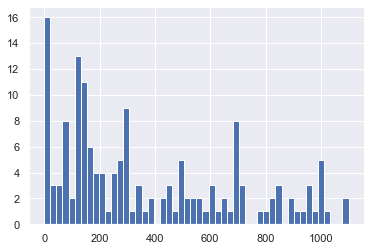

In [84]:
plt.hist(my_df.Weight, bins=50)

Since length, height, and width are scaled, we need to interpret their coefficients a little bit different from before\
* scaled_length = 111.0133: an increase of one standard deviation in length (vertical+cross+diagnol) corresponds to an increase of 111.0133 g in weight
* scaled_height = 211.8613: an increase of one standard deviation in height corresponds to an increase of 211.8613 g in weight
* scaled_width = 84.7395: an increase of one standard deviation in height corresponds to an increase of 84.7395 g in weight
* Note: Once scaling the data, we are able to compare the impact of each, length, height, width since they are in the same magnitude. The usefulness of standardization will be more clear when we have independent variables of different units, standardization will allow comparision of impacts between each independent variable on the variable of interest y

In [131]:
211.8613/my_df.Height.std()

48.860169180662666

* One cm increase in Height corresponds to 49g increase in Weight. If we connect to the simple regression model that we get above where coefficient for Height = 60 (one cm increase in Height corresponds to 60 g increase in Weight), it is kinda reasonable. We get smaller coefficient in this second model because now we take into account other factors that can influence fish Weight besides its Height. Before, we put more pressure on Height to try to create the line of best fit to explain our data points. Thus, we will better predict if we can include as many meaningful features in our model as possible

##### p_values

* Almost all coefficients' p-values are less than 5% to be significant or in other words => So it seems that all coefficients significantly contribute to the prediction of our models 

#### R-squared: 
94.6% of fish Weight are explained by our model => Fantastic!!!


### More test on our model

#### Normality of residuals

One of the assumption when using linear regression is that residuals must follow a normal distribution\
Residual is the difference between prediction value and actual value \
If our model has taken into account all important trends, the residuals resemble whitenoise, random values that have no pattern or trend in it and follow a normal distribution

Lets first use the model to make predictions, then calculate the residuals by subtracting the prediction value from the actual value

In [132]:
yhat = multivariate_reg_result.predict(sa.add_constant(x_train))

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


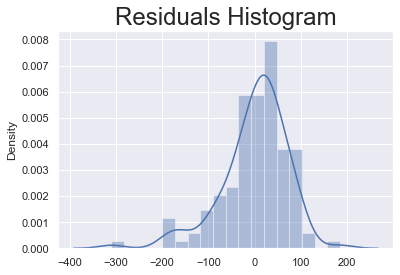

In [133]:
residuals = yhat.values-y_train.Weight.values
sns.distplot(residuals)
plt.title('Residuals Histogram', size=24)
plt.show()

We obtain a "bell curve shape" line as we would expect for a normal distribution. We can also observe a qq plot. 
In a qq plot, y axis shows the "observed value", in our example it is the Residual, and x axis shows the number of standard deviation of the value from the mean of residuals. For some dataset to be normally distributed, "observed values" should line neatly along the red line

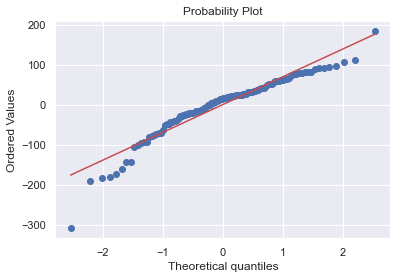

In [134]:
scipy.stats.probplot(residuals, plot=pylab)
pylab.show()

#### Feature selections

In [123]:
from sklearn.feature_selection import f_regression


In [143]:
np.round(f_regression(x_train, y_train)[1], 3)

C:\Users\Tuyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.   , 0.   , 0.   , 0.021, 0.682, 0.309, 0.008, 0.   , 0.162])

In [144]:
x_train.columns

Index(['scaled_length', 'scaled_height', 'scaled_width', 'Parkki', 'Perch',
       'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

##### Testing on the testing set

In [158]:
yhat_test = multivariate_reg_result.predict(sa.add_constant(x_test))


Text(0, 0.5, 'Predicted Weight')

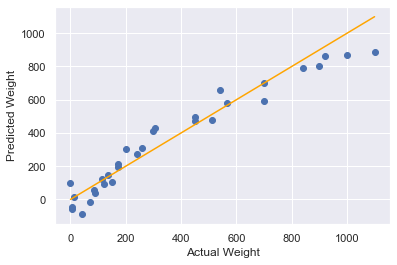

In [174]:
# draw a 45 degree line: y=x
x = np.arange(1100)
y = x
plt.plot(x,y, c="orange")

# draw a scatter plot, along x axis shows actual y values and along y axis shows the prediction values
plt.scatter(y_test, yhat_test)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')

We can also compute the residuals

In [165]:
residuals = yhat_test.values - y_test.Weight.values

In [170]:
np.abs(residuals).mean()

64.13265665611551

(array([1., 0., 2., 3., 6., 3., 7., 4., 0., 5.]),
 array([-215.13679228, -181.0338419 , -146.93089152, -112.82794114,
         -78.72499077,  -44.62204039,  -10.51909001,   23.58386037,
          57.68681075,   91.78976113,  125.89271151]),
 <BarContainer object of 10 artists>)

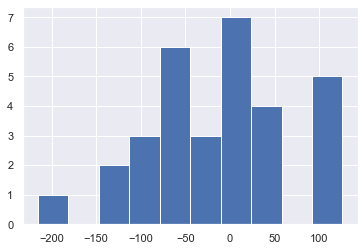

In [171]:
plt.hist(residuals)